In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Part One - Problem Solving

##### Part A

The first step is to plow the camber line. This is done by creating an array of $x$ values between $0$ and $1$, the unit chord, and then for each value in the array, calculating the $y$ value. As there are two sections to the camber line, an ```if``` statement determines which function to apply.

$$y=\begin{cases}
0.12\left(2x-3x^2\right) & \text{for }x\leq\frac{1}{3}\\
0.03\left(1+2x-3x^2\right)&\text{for }x\geq\frac{1}{3}
\end{cases}$$

In [6]:
x = np.arange(0,1,0.001)
y=[]
for i in range(len(x)):
    if x[i]<(1/3):
        y.append(0.12*((2*x[i])-3*pow(x[i],2)))
    else:
        y.append(0.03*(1+(2*x[i])-(3*pow(x[i],2))))

Once all the $x$ and $y$ values have been calculated, the maximum camber can be found.

In [7]:
max_y = max(y)
max_x = x[y.index(max(y))]

The result shows a maximum camber of {{round(max_y\*100)}} \% which is found at {{round(max_x\*100,1)}}\% chord.

Plotting the $x$ and $y$ values gives the below camber line. The maximum camber location is also marked.

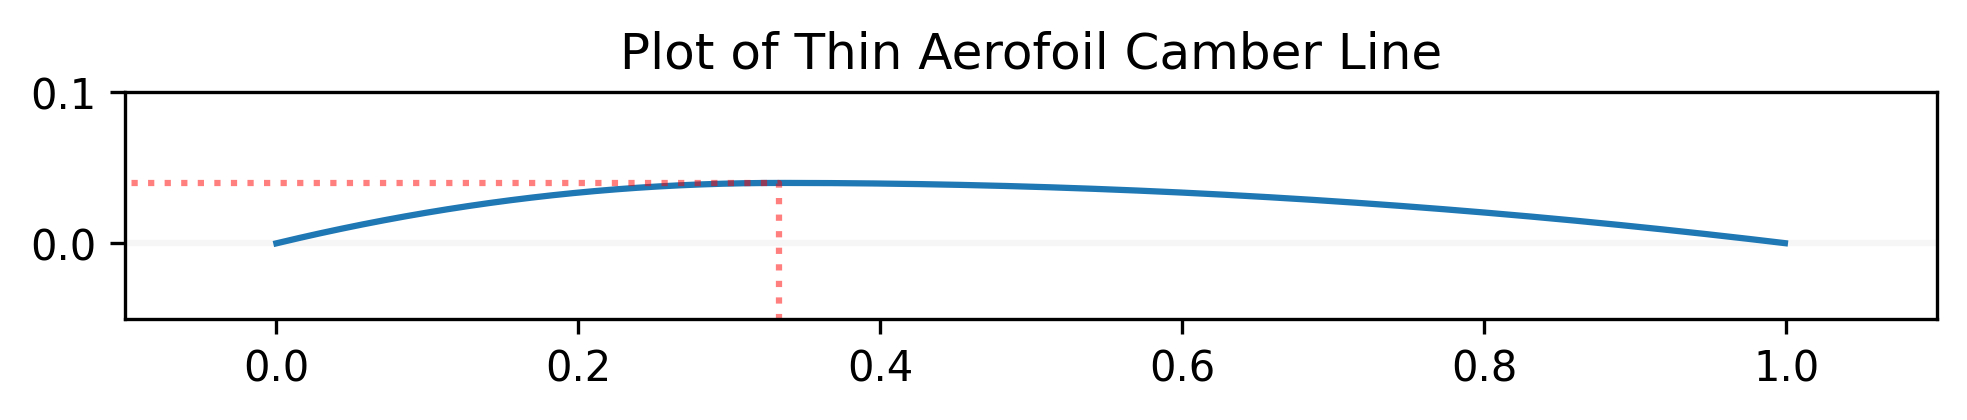

In [8]:
fig, ax = plt.subplots(dpi=300, figsize=(10,1))
ax.plot(x,y, label='Chord Line')
ax.plot([-1,max_x,max_x], [max_y, max_y,-1],'r:', alpha=0.5, label='Max Thickness')
ax.axhline(0, c='#d3d3d3', alpha=0.2, zorder=0)
ax.set_ylim(-0.05, 0.1), ax.set_xlim(-0.1,1.1), ax.set_aspect(1)
ax.set_title('Plot of Thin Aerofoil Camber Line');

##### Part B

The differentiation of the front and aft sections are as follows:

$$\frac{dy}{dx}=\begin{cases}
0.24-0.72x & \text{for }x\leq\frac{1}{3}\\
0.06-0.18x & \text{for }x\geq\frac{1}{3}
\end{cases}$$

Converting to a polar coordinate system using $x=0.5\left(1-\cos\phi\right)$ gives:

$$\frac{dy}{dx}=\begin{cases}
0.36\cos\phi-0.12 & \text{for }\phi\leq\phi_{mc}\\
0.09\cos\phi-0.03 & \text{for }\phi\geq\phi_{mc}
\end{cases}
$$

The switching point is also transformed. $x=\frac13=0.5\left(1-\cos\phi\right)$. This results in the transition point being at {{round(np.arccos(1/3),4)}} radians.

In [9]:
phi_switch = np.arccos(1/3)

In [10]:
dy_f0 = lambda x:(0.36*np.cos(x))-0.12
dy_a0 = lambda x:(0.09*np.cos(x))-0.03
A0 = (integrate.quad(dy_f0, 0, phi_switch)[0] + integrate.quad(dy_a0,phi_switch,np.pi)[0])/np.pi

The above integation gives a result of $A_0$ = {{round(A0,4)}}.

In [11]:
dy_f1 = lambda x:((0.36*np.cos(x))-0.12)*np.cos(x)
dy_a1 = lambda x:((0.09*np.cos(x))-0.03)*np.cos(x)
A1 = (integrate.quad(dy_f1, 0, phi_switch)[0] + integrate.quad(dy_a1,phi_switch,np.pi)[0])*(2/np.pi)

The above integation gives a result of $A_1$ = {{round(A1,4)}}.

In [12]:
alpha_0 = np.degrees(A0-A1/2)

The above equations gives $\alpha_0$ = {{round(alpha_0,2)}}

##### Part C

In [13]:
dy_f2 = lambda x:((0.36*np.cos(x))-0.12)*np.cos(2*x)
dy_a2 = lambda x:((0.09*np.cos(x))-0.03)*np.cos(2*x)
A2 = (integrate.quad(dy_f2, 0, phi_switch)[0] + integrate.quad(dy_a2,phi_switch,np.pi)[0])*(2/np.pi)
Cm25 = (np.pi/4)*(A2-A1)

The above equations complete the required components of the pitching moment equation and then calculate the pitching moment about 25\% chord to get $C_{M,0.25}=$ {{round(Cm25,4)}}

# Part Two - Problem Setting

##### Part A

The first step to this stage is to plot the variation of $\frac{dy}{dx}$ with $x$. The same $x$ scale can be used, however a new $y$ array will be set to the new values. In the array ```dy``` each $x$ has the calculated $y$ value
$$\frac{dy}{dx}=\begin{cases}
0.24-0.72x & \text{for }x\leq\frac{1}{3}\\
0.06-0.18x & \text{for }x>\frac{1}{3}
\end{cases}$$
and for the array ```dyy```, each $x$ value has the calculated $y$ value
$$\frac{d^2y}{dx^2}=\begin{cases}
0.72 & \text{for }x\leq\frac{1}{3}\\
-0.18 & \text{for }x>\frac{1}{3}
\end{cases}$$

In [14]:
dy=[]
dyy=[]
for i in range(len(x)):
    if x[i]<(1/3):
        dy.append(0.24-(0.72*x[i]))
        #dyy.append(0.72)
    else:
        dy.append(0.06-(0.18*x[i]))
        #dyy.append(-0.18)

Again these values can be plot to give the below graph. Additionaly shown on the graph is the camber line to get a better understanding of the meaning of the plotted lines.

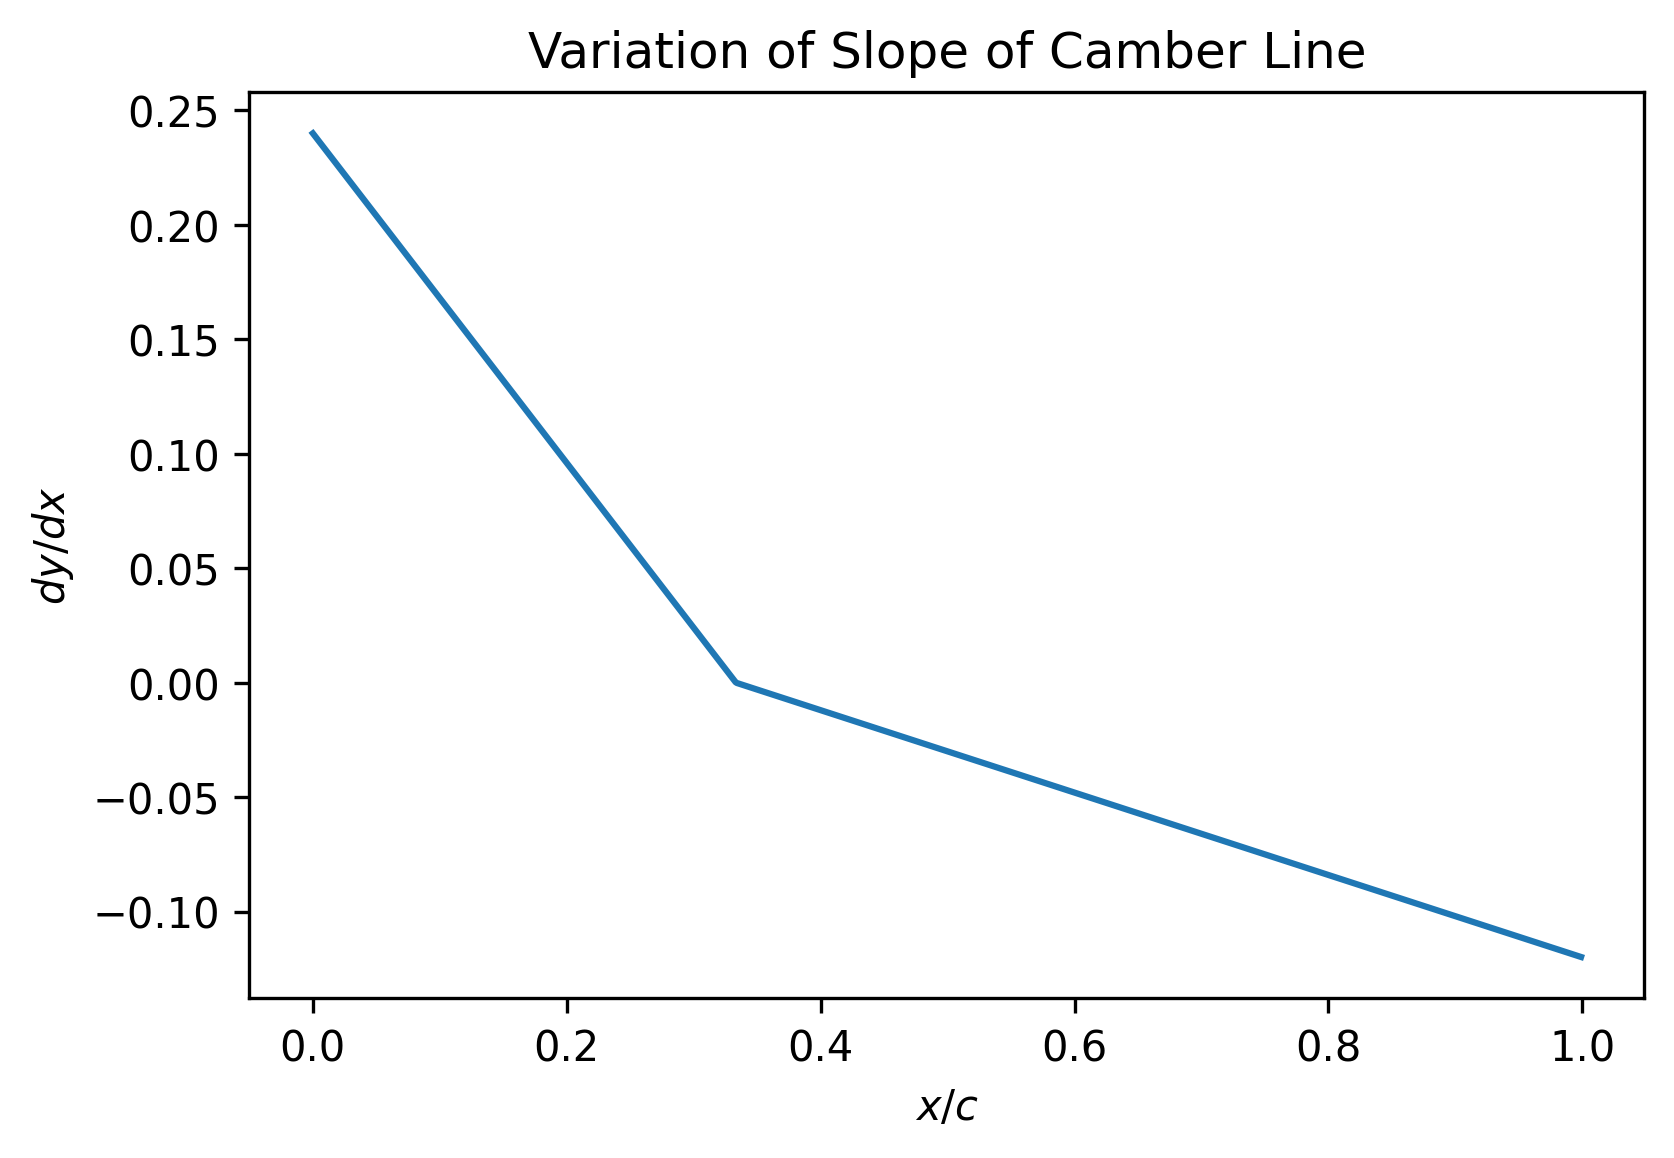

In [11]:
fig2, ax2 = plt.subplots(dpi=300)
ax2.plot(x, dy, label=r'$dy/dx$')
ax2.set_ylabel('$dy/dx$'), ax2.set_xlabel('$x/c$')
ax2.set_title('Variation of Slope of Camber Line');

##### Part B

For a maximum camber, $a$, at a location, $b$, we can say from the above that the derivative of the camber line can be written as
$$\frac{dy}{dx}=\begin{cases}
K_1(x-b) & \text{for }x\leq b \\
K_2(x-b) & \text{for }x\geq b
\end{cases}$$

Integrating the above gives the camber line equations
$$y=\begin{cases}
K_1\left(\frac{x^2}{2}-bx\right) +C_1 & \text{for }x\leq b\\
K_2\left(\frac{x^2}{2}-bx\right) +C_2 & \text{for }x\geq b
\end{cases}$$

For the *forward* section of the camber line, we know that at $x=0$, $y=0$. Using this
$$\begin{align}K_1\left(\frac{0^2}{2}-b(0)\right) + C_1 &= 0\\
\therefore C_1&=0
\end{align}$$

In [12]:
custom = interactive(camber_plot, max_c=widgets.FloatSlider(min=0, max=10, value=4, description='Max Camber'), x_max=widgets.FloatSlider(min=0, max=100, step=0.5, value=25, description='Location'));
custom

interactive(children=(FloatSlider(value=4.0, description='Max Camber', max=10.0), FloatSlider(value=25.0, desc…

My allocated values of a maximum of 2.5% camber at 28% chord produce the following camber line.

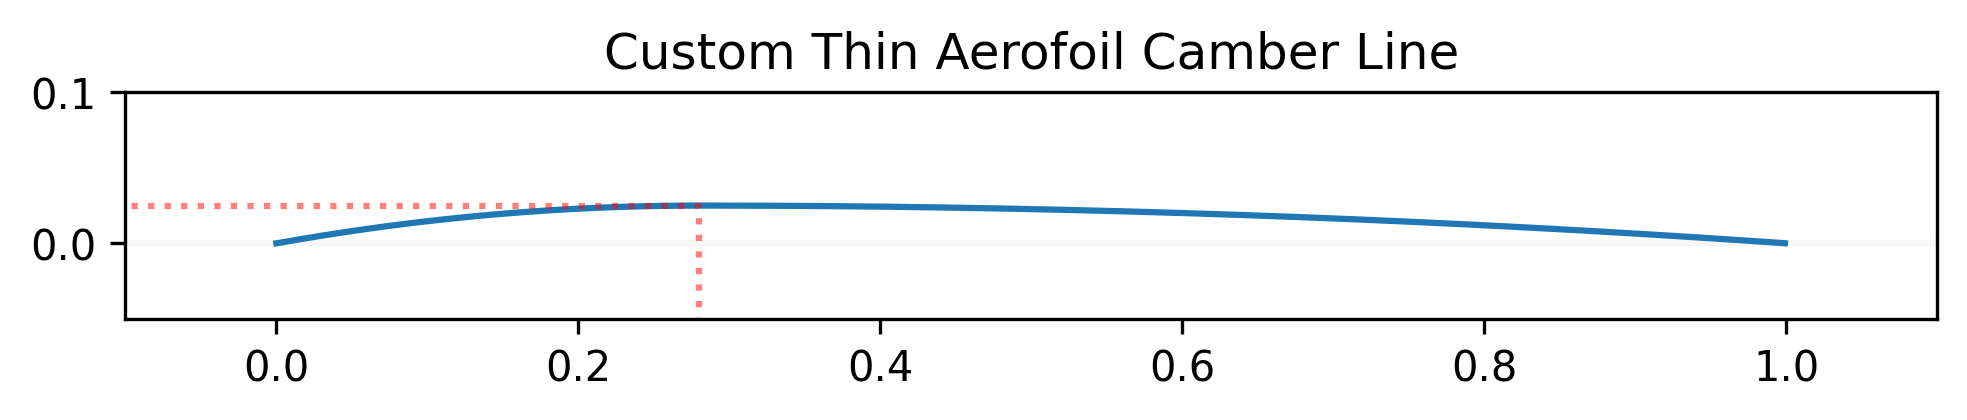

A0 = 0.0139
A1= 0.1103
A2 = 0.0416
Alpha 0 = -0.0413
Cm0.25 = -0.0539
Switching Point = 1.1152


In [15]:
camber_plot(2.5,28)

##### Part C

Using the previous general formula for a double-parabola camber line the previous analysis can be carried out more generally.

The differentiation of the general equation gives the following:

$$\frac{dy}{dx}=\begin{cases}
\frac{2a}{b}-\frac{2a}{b^2}x &\text{for }x\leq b\\
\frac{-2a}{(1-b)}+\frac{2a}{(1-b)^2}-\frac{2a}{(1-b)^2}x &\text{for }x\geq b
\end{cases}
$$

Again transforming this into the polar coordinate system gives:

$$\frac{dy}{dx}=\begin{cases}
\frac{2a}{b}+\frac{a}{b^2}\left(\cos\phi-1\right)&\text{for }\phi\leq \phi_{mc}\\
\frac{-2a}{(1-b)}+\frac{2a}{(1-b)^2}+\frac{a}{(1-b)^2}\left(\cos\phi-1\right)&\text{for }\phi\geq \phi_{mc}
\end{cases}
$$

#### Functions

Function for drawing the camber line for any given maximum camber and maximum camber location.

In [4]:
def camber_plot(max_c,x_max):
    x_new = np.arange(0,1,0.001)
    y_new=[]
    x_max=x_max/100
    max_c=max_c/100
    for i in range(len(x)):
        if x_new[i]<(x_max):
            y_new.append(max_c*(2*(x_new[i]/x_max)-pow((x_new[i]/x_max),2)))
        else:
            y_new.append(max_c*(2*((1-x_new[i])/(1-x_max))-pow(((1-x_new[i])/(1-x_max)),2)))
    
    max_y = max(y_new)
    max_x = x_new[y_new.index(max(y_new))]
    
    fig, ax = plt.subplots(dpi=300, figsize=(10,1))
    ax.plot(x_new,y_new, label='Chord Line')
    ax.plot([-1,max_x,max_x], [max_y, max_y,-1],'r:', alpha=0.5, label='Max Thickness')

    ax.axhline(0, c='#d3d3d3', alpha=0.2, zorder=0)

    ax.set_ylim(-0.05, 0.1)
    ax.set_xlim(-0.1,1.1)
    ax.set_aspect(1)

    ax.set_title('Custom Thin Aerofoil Camber Line')
    plt.show()
    
    analysis(max_c,x_max)

Analysis of custom camber line.

In [1]:
def analysis(a,b):
    A={}
    phi_mc = np.arccos(1-2*b)

    dy_f = lambda x: ((2*a)/(b)-((a)/(b**2))*(1-np.cos(x)))*np.cos(i*x)
    dy_a = lambda x: ((2*b*a)/((b-1)**2)-(a/((b-1)**2))*(1-np.cos(x)))*np.cos(i*x)

    for i in range(3):
        if i==0:
            A[i]=(integrate.quad(dy_f, 0, phi_mc)[0] + integrate.quad(dy_a,phi_mc,np.pi)[0])/np.pi
        else:
            A[i]=(integrate.quad(dy_f, 0, phi_mc)[0] + integrate.quad(dy_a,phi_mc,np.pi)[0])*(2/np.pi)
    alpha_0 = A[0]-A[1]/2
    Cm25 = (np.pi/4)*(A[2]-A[1])
    
    print('A0 = ' + str(round(A[0],4)))
    print('A1= ' + str(round(A[1],4)))
    print('A2 = ' + str(round(A[2],4)))
    print('Alpha 0 = ' + str(round(alpha_0,4)))
    print('Cm0.25 = ' + str(round(Cm25,4)))
    print('Switching Point = ' + str(round(phi_mc,4)))